In [369]:
!pip install pandas
!pip install openpyxl
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install statsmodels

You should consider upgrading via the '/Users/ashiksaibabut/Projects/IITB/LeadPrediction/env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/ashiksaibabut/Projects/IITB/LeadPrediction/env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/ashiksaibabut/Projects/IITB/LeadPrediction/env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/ashiksaibabut/Projects/IITB/LeadPrediction/env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/ashiksaibabut/Projects/IITB/LeadPrediction/env/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/ashiksaibabut/Projects/IITB/LeadPrediction/env/bin/python3 -m pip install --upgrade pip' command.


In [478]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix

In [479]:
df = pd.read_csv('/Users/ashiksaibabut/Projects/IITB/LeadPrediction/dataset/Lead Scoring Assignment/Leads.csv')
data_dict_df = pd.read_excel('/Users/ashiksaibabut/Projects/IITB/LeadPrediction/dataset/Lead Scoring Assignment/Leads Data Dictionary.xlsx')

In [480]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [373]:
data_dict_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Variables,Description
2,NaN,Prospect ID,A unique ID with which the customer is identif...
3,NaN,Lead Number,A lead number assigned to each lead procured.
4,NaN,Lead Origin,The origin identifier with which the customer ...
5,NaN,Lead Source,"The source of the lead. Includes Google, Organ..."
6,NaN,Do Not Email,An indicator variable selected by the customer...
7,NaN,Do Not Call,An indicator variable selected by the customer...
8,NaN,Converted,The target variable. Indicates whether a lead ...
9,NaN,TotalVisits,The total number of visits made by the custome...


### Data Exploration

In [374]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [376]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [377]:
# categorical columns
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)

### Data Cleaning

#### Drop unwanted columns

In [378]:
# drop user specific information which should not be part of the prediction
drop_cols = ['Prospect ID', 'Lead Number']
df.drop(columns=drop_cols, inplace=True)

In [379]:
# drop cols which have ~ 0 variance
drop_cols = ['Do Not Call', 'What matters most to you in choosing a course', 'Magazine', 'Newspaper Article',  'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations',
             'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Search'] 
df.drop(columns=drop_cols, inplace=True)

#### Reduce labels in categorical columns

In [380]:
df['Lead Origin'].value_counts()/len(df['Lead Origin'])*100

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: count, dtype: float64

##### 'Lead Add Form', 'Lead Import' and 'Quick Add Form' togather constitutes ~8.5%. Grouping them will reduce the complexity of the model created.

In [381]:
df['Lead Origin'] = df['Lead Origin'].map({'Landing Page Submission': 'Landing Page Submission', 'API': 'API', 'Lead Add Form': 'Other', 'Lead Import': 'Other', 'Quick Add Form': 'Other', 'Other': 'Other'})
df['Lead Origin'].value_counts()/len(df['Lead Origin'])*100

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Other                       8.376623
Name: count, dtype: float64

##### Similary group all labels with low % of occurences.


In [382]:
df['Lead Source'].value_counts()/len(df['Lead Source'])*100

Lead Source
Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: count, dtype: float64

In [383]:
other_cols = ['Reference',
       'Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'google',
       'Click2call', 'Press_Release', 'Social Media', 'Live Chat',
       'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home',
       'WeLearn', 'blog', 'NC_EDM']

df['Lead Source'] = df['Lead Source'].map(lambda x:  x if x not in other_cols else 'Other')
df['Lead Source'].value_counts()/len(df['Lead Source'])*100

Lead Source
Google            31.038961
Direct Traffic    27.521645
Olark Chat        18.993506
Organic Search    12.489177
Other              9.567100
Name: count, dtype: float64

In [384]:
df['Last Activity'].value_counts()/len(df['Last Activity'])*100

Last Activity
Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: count, dtype: float64

In [385]:
other_cols = ['Page Visited on Website', 'Converted to Lead', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront',
       'View in browser link Clicked', 'Email Received', 'Email Marked Spam',
       'Visited Booth in Tradeshow', 'Resubscribed to emails']

df['Last Activity'] = df['Last Activity'].map(lambda x:  x if x not in other_cols else 'Other')
df['Last Activity'].value_counts()/len(df['Last Activity'])*100

Last Activity
Email Opened               37.196970
SMS Sent                   29.707792
Other                      21.450216
Olark Chat Conversation    10.530303
Name: count, dtype: float64

In [386]:
df['Country'].value_counts()/len(df['Country'])*100

Country
India                   70.259740
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Hong Kong                0.075758
Bahrain                  0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
South Africa             0.043290
Nigeria                  0.043290
Germany                  0.043290
Kuwait                   0.043290
Canada                   0.043290
Sweden                   0.032468
China                    0.021645
Asia/Pacific Region      0.021645
Uganda                   0.021645
Bangladesh               0.021645
Italy                    0.021645
Belgium                  0.021645
Netherlands              0.021645
Ghana                    0.021645
Philippines              0.021645
Russia                   0.010823
Switze

In [387]:
df['Country'] = df['Country'].map(lambda x:  x if x in ['India'] else 'Other')
df['Country'].value_counts()/len(df['Country'])*100

Country
India    70.25974
Other    29.74026
Name: count, dtype: float64

In [388]:
df['Specialization'] = df['Specialization'].map(lambda x: np.nan if x == 'Select' else x)

In [389]:
df['Specialization'].value_counts()/df['Specialization'].value_counts().sum()*100

Specialization
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: count, dtype: float64

In [390]:
other_cols = ['Operations Management',
       'Business Administration', 'IT Projects Management',
       'Supply Chain Management', 'Banking, Investment And Insurance',
       'Travel and Tourism', 'Media and Advertising', 'International Business',
       'Healthcare Management', 'Hospitality Management', 'E-COMMERCE',
       'Retail Management', 'Rural and Agribusiness', 'E-Business',
       'Services Excellence']

df['Specialization'] = df['Specialization'].map(lambda x:  x if x not in other_cols else 'Other')
df['Specialization'].value_counts()/df['Specialization'].value_counts().sum()*100

Specialization
Other                        54.573379
Finance Management           16.655290
Human Resource Management    14.470990
Marketing Management         14.300341
Name: count, dtype: float64

In [391]:
df['How did you hear about X Education'] = df['How did you hear about X Education'].map(lambda x: np.nan if x == 'Select' else x)

In [392]:
df['How did you hear about X Education'].value_counts()/df['How did you hear about X Education'].value_counts().sum()*100

How did you hear about X Education
Online Search            40.603015
Word Of Mouth            17.487437
Student of SomeSchool    15.577889
Other                     9.346734
Multiple Sources          7.638191
Advertisements            3.517588
Social Media              3.366834
Email                     1.306533
SMS                       1.155779
Name: count, dtype: float64

In [393]:
other_cols = ['Other',
       'Multiple Sources', 'Advertisements', 'Social Media', 'Email', 'SMS']

df['How did you hear about X Education'] = df['How did you hear about X Education'].map(lambda x:  x if x not in other_cols else 'Other')
df['How did you hear about X Education'].value_counts()/df['How did you hear about X Education'].value_counts().sum()*100

How did you hear about X Education
Online Search            40.603015
Other                    26.331658
Word Of Mouth            17.487437
Student of SomeSchool    15.577889
Name: count, dtype: float64

In [394]:
df['What is your current occupation'].value_counts()/df['What is your current occupation'].value_counts().sum()*100

What is your current occupation
Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: count, dtype: float64

In [395]:
other_cols = ['Student', 'Other', 'Housewife', 'Businessman']

df['What is your current occupation'] = df['What is your current occupation'].map(lambda x:  x if x not in other_cols else 'Other')
df['What is your current occupation'].value_counts()/df['What is your current occupation'].value_counts().sum()*100

What is your current occupation
Unemployed              85.496183
Working Professional    10.778626
Other                    3.725191
Name: count, dtype: float64

In [396]:
df['Tags'].value_counts()/df['Tags'].value_counts().sum()*100

Tags
Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                               

In [397]:
other_cols = ['Interested in other courses', 'Already a student',
       'Closed by Horizzon', 'switched off', 'Busy', 'Lost to EINS',
       'Not doing further education', 'Interested  in full time MBA',
       'Graduation in progress', 'invalid number',
       'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
       'number not provided', 'in touch with EINS', 'Lost to Others',
       'Still Thinking', 'Want to take admission but has financial problems',
       'In confusion whether part time or DLP', 'Interested in Next batch',
       'Lateral student', 'Shall take in the next coming month',
       'University not recognized', 'Recognition issue (DEC approval)']

df['Tags'] = df['Tags'].map(lambda x:  x if x not in other_cols else 'Other')
df['Tags'].value_counts()/df['Tags'].value_counts().sum()*100

Tags
Other                                  44.368949
Will revert after reading the email    35.196195
Ringing                                20.434856
Name: count, dtype: float64

In [398]:
df['Lead Profile'] = df['Lead Profile'].map(lambda x: np.nan if x == 'Select' else x)

In [399]:
df['Lead Profile'].value_counts()/df['Lead Profile'].value_counts().sum()*100

Lead Profile
Potential Lead                 67.631027
Other Leads                    20.419287
Student of SomeSchool          10.104822
Lateral Student                 1.006289
Dual Specialization Student     0.838574
Name: count, dtype: float64

In [400]:
other_cols = ['Student of SomeSchool',
       'Lateral Student', 'Dual Specialization Student']

df['Lead Profile'] = df['Lead Profile'].map(lambda x:  x if x not in other_cols else 'Other')
df['Lead Profile'].value_counts()/df['Lead Profile'].value_counts().sum()*100

Lead Profile
Potential Lead    67.631027
Other Leads       20.419287
Other             11.949686
Name: count, dtype: float64

In [401]:
df['City'] = df['City'].map(lambda x: np.nan if x == 'Select' else x)

In [402]:
df['City'].value_counts()/df['City'].value_counts().sum()*100

City
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: count, dtype: float64

In [403]:
other_cols = ['Other Cities of Maharashtra', 'Other Metro Cities', 'Tier II Cities']

df['City'] = df['City'].map(lambda x:  x if x not in other_cols else 'Other')
df['City'].value_counts()/df['City'].value_counts().sum()*100

City
Mumbai               57.835218
Other                16.352540
Thane & Outskirts    13.498474
Other Cities         12.313768
Name: count, dtype: float64

In [404]:
df['Last Notable Activity'].value_counts()/df['Last Notable Activity'].value_counts().sum()*100

Last Notable Activity
Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: count, dtype: float64

In [405]:
other_cols = ['Page Visited on Website',
       'Olark Chat Conversation', 'Email Link Clicked', 'Email Bounced',
       'Unsubscribed', 'Unreachable', 'Had a Phone Conversation',
       'Email Marked Spam', 'Approached upfront', 'Resubscribed to emails',
       'View in browser link Clicked', 'Form Submitted on Website',
       'Email Received']

df['Last Notable Activity'] = df['Last Notable Activity'].map(lambda x:  x if x not in other_cols else 'Other')
df['Last Notable Activity'].value_counts()/df['Last Notable Activity'].value_counts().sum()*100

Last Notable Activity
Modified        36.872294
Email Opened    30.595238
SMS Sent        23.506494
Other            9.025974
Name: count, dtype: float64

### Handling Null values


In [406]:
df.isnull().sum()/len(df)*100

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                    0.000000
Specialization                            36.580087
How did you hear about X Education        78.463203
What is your current occupation           29.112554
Tags                                      36.287879
Lead Quality                              51.590909
Lead Profile                              74.188312
City                                      39.707792
Asymmetrique Activity Index               45.649351
Asymmetrique Profile Index                45.649351
Asymmetrique Activity Score               45.649351
Asymmetrique

#### Drop all columns with > 40% of null values. 
The choice  40 is made based on the columns i understand is required as part of my domain knowledge.

In [407]:
for col in df.columns:
    if df[col].isnull().sum()/len(df)*100 > 40:
        df.drop(columns=[col], inplace=True)

In [408]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Other,Other,NaN,Unemployed,Other,NaN,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Ringing,NaN,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Other,Other,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Other,India,Other,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Other,India,NaN,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [409]:
df.isnull().sum()/len(df)*100

Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                    0.000000
Specialization                            36.580087
What is your current occupation           29.112554
Tags                                      36.287879
City                                      39.707792
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

#### Impute null values <2% 

In [410]:
# In categorical values impute with null values
mode_ = df['Lead Source'].mode().values[0]
df['Lead Source'] = df['Lead Source'].fillna(mode_)

<Axes: ylabel='TotalVisits'>

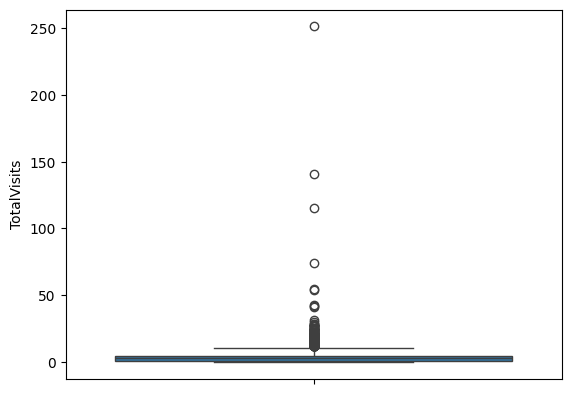

In [411]:
sns.boxplot(df['TotalVisits'])

##### Since there are outliers in the distribution of 'TotalVissits', we will use the median to impute null values

In [412]:
median_ = df['TotalVisits'].median()
df['TotalVisits'] = df['TotalVisits'].fillna(median_)

<Axes: ylabel='Page Views Per Visit'>

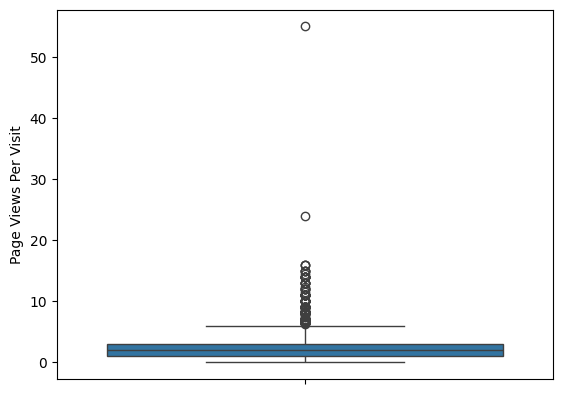

In [413]:
sns.boxplot(df['Page Views Per Visit'])

##### Since there are outliers in the distribution of 'Page Views Per Visit', we will use the median to impute null values

In [414]:
median_ = df['Page Views Per Visit'].median()
df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(median_)

In [415]:
# In categorical values impute with null values
mode_ = df['Last Activity'].mode().values[0]
df['Last Activity'] = df['Last Activity'].fillna(mode_)

In [416]:
df[df['Specialization'].isnull()]['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              1828
Other                     88
Working Professional      31
Name: count, dtype: int64

### 'Specialization' may be null because the individual is not currently working in any domain or not intreseted to be tied in a particular domain. Hence this is a valid choice. Replacing it with 'No Preference'

In [417]:
df['Specialization'] = df['Specialization'].fillna('No Preference')

#### 'What is your current occupation' may be null because the individual is not ready to mention the working status. Replacing it with 'Not mentioned'

In [418]:
df['What is your current occupation'] = df['What is your current occupation'].fillna('Not mentioned')

#### 'Tags' may be null because no actions have beed taken towards this lead. Replacing it with 'No actions done'

In [419]:
df['Tags'] = df['Tags'].fillna('No actions done')

In [420]:
df[df['City'].isnull()].Country.value_counts()

Country
Other    2115
India    1554
Name: count, dtype: int64

#### Since there are two Country groups for City with Null values, we will fill each of them with the group mode value instead of imputing with the mode of whole data

In [421]:
india_mode = df[df.Country == 'India']['City'].mode().values[0]
other_mode = df[df.Country == 'Other']['City'].mode().values[0]
print(india_mode, other_mode)


Mumbai Mumbai


##### Since both mode values point to Mumbai, we will use that to impute City

In [422]:
df['City'] = df['City'].fillna(india_mode)

### Outlier Analysis in numeric columns

In [423]:
numeric_cols = [col for col in df.columns if col not in categorical_cols]
numeric_cols

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

{'whiskers': [<matplotlib.lines.Line2D at 0x28abd35b0>,
 'caps': [<matplotlib.lines.Line2D at 0x28abd39d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28abd3340>],
 'medians': [<matplotlib.lines.Line2D at 0x28abd3f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x28abe21f0>],
 'means': []}

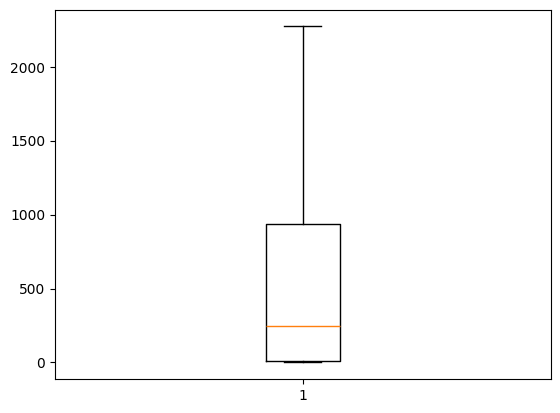

In [424]:
plt.boxplot(df['Total Time Spent on Website'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28ac35400>,
 'caps': [<matplotlib.lines.Line2D at 0x28ac35820>,
 'boxes': [<matplotlib.lines.Line2D at 0x28ac35160>],
 'medians': [<matplotlib.lines.Line2D at 0x28ac35d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x28ac43040>],
 'means': []}

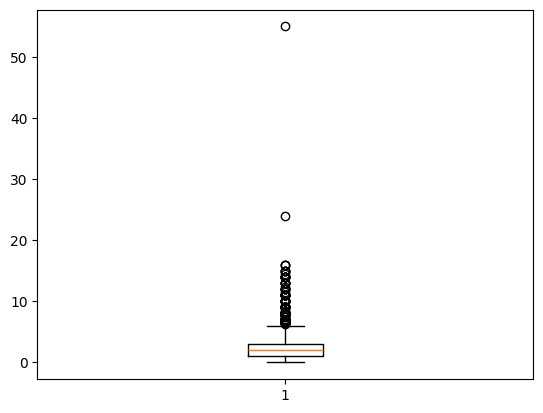

In [425]:
plt.boxplot(df['Page Views Per Visit'])

{'whiskers': [<matplotlib.lines.Line2D at 0x28ac9f250>,
 'caps': [<matplotlib.lines.Line2D at 0x28ac9f790>,
 'boxes': [<matplotlib.lines.Line2D at 0x28abe2640>],
 'medians': [<matplotlib.lines.Line2D at 0x28ac9fcd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x28ac9ff70>],
 'means': []}

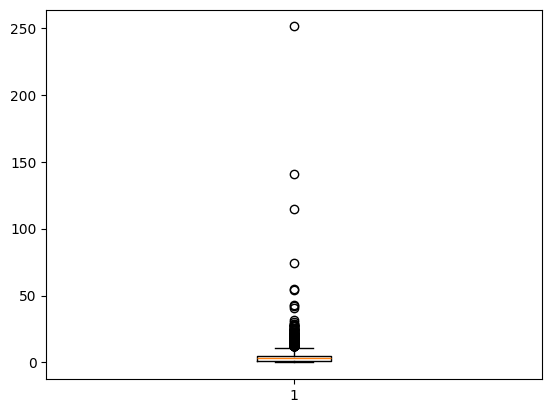

In [426]:
plt.boxplot(df['TotalVisits'])

### TotalVisits and Page views per visit have outliers

In [427]:
upper_limit = df['TotalVisits'].quantile(0.95)

In [428]:
df[df['TotalVisits'] > upper_limit]['Converted'].value_counts()

Converted
0    188
1    165
Name: count, dtype: int64

#### We can see that the convertion rate has enough variance when the TotalVisits > 95 percentile. Using capping

In [429]:
df['TotalVisits'] = df['TotalVisits'].map(lambda x: upper_limit+1 if x > upper_limit else x)

In [430]:
upper_limit = df['Page Views Per Visit'].quantile(0.95)

In [431]:
df[df['Page Views Per Visit'] > upper_limit]['Converted'].value_counts()

Converted
0    222
1    138
Name: count, dtype: int64

In [432]:
df['Page Views Per Visit'] = df['Page Views Per Visit'].map(lambda x: upper_limit+1 if x > upper_limit else x)

### EDA

In [433]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Other,Other,No Preference,Unemployed,Other,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,No Preference,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Other,Other,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Other,India,Other,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Other,India,No Preference,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [434]:
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)
        
print(categorical_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


#### Univariate Analysis

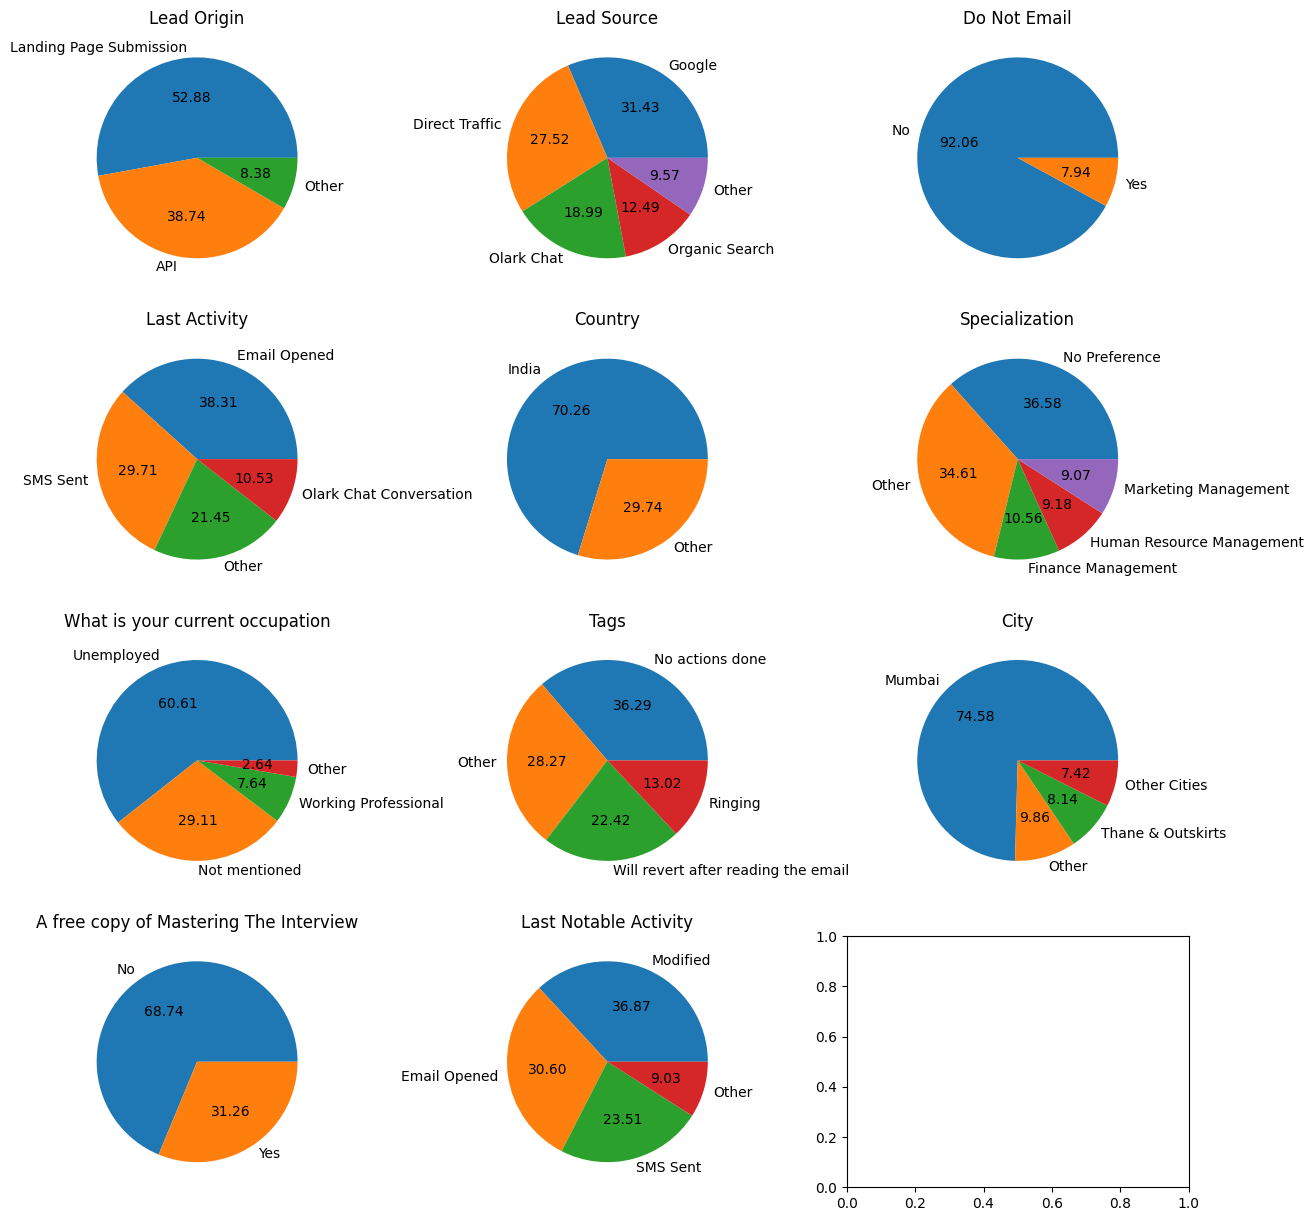

In [435]:
plot, ax = plt.subplots(nrows=4, ncols=3, figsize=[15, 15])

for i, col in enumerate(categorical_cols):
    row, col_ = i // 3, i% 3
    ax[row, col_].pie(x=df[col].value_counts(), labels=df[col].value_counts().keys(), autopct='%.2f')
    ax[row, col_].set_title(col)

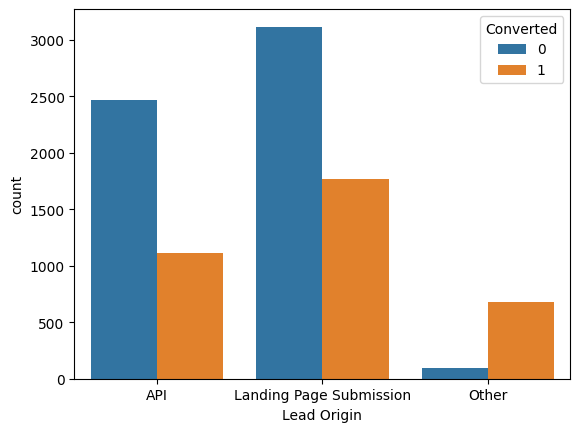

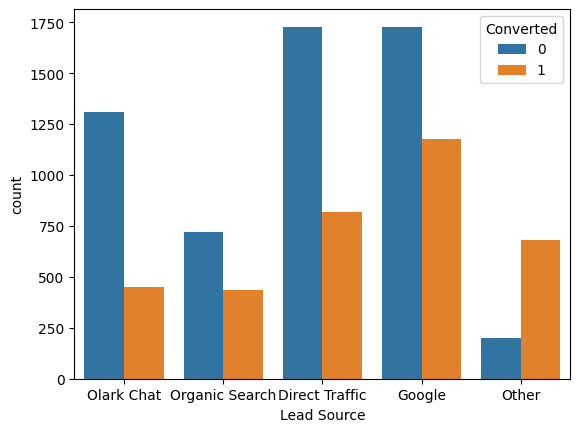

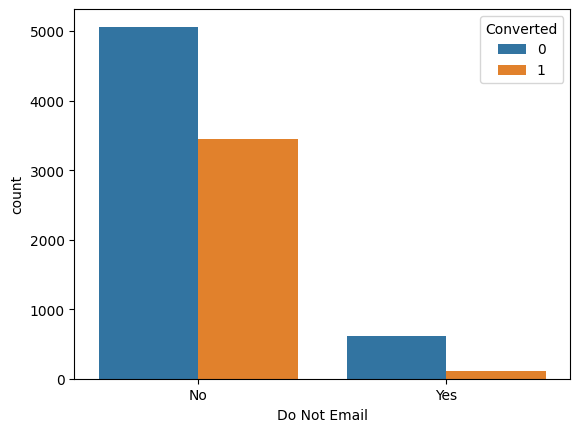

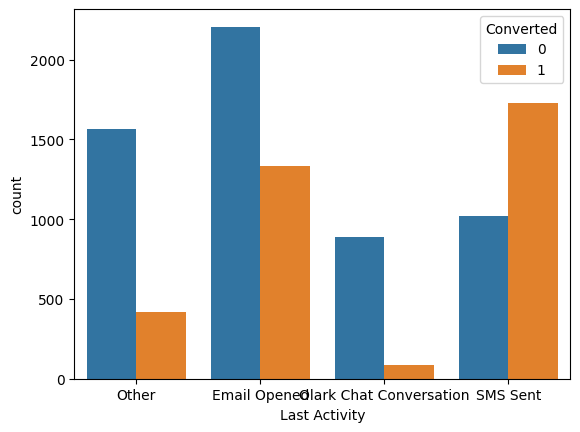

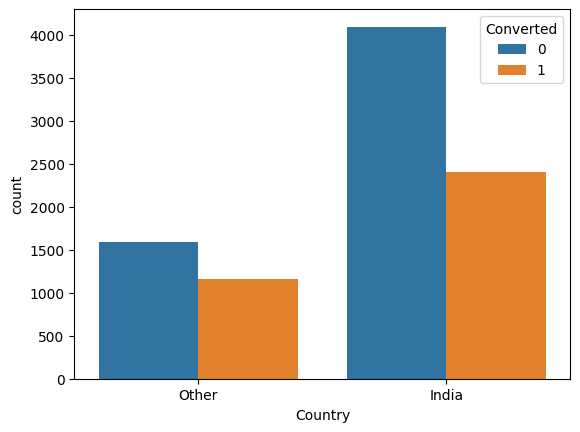

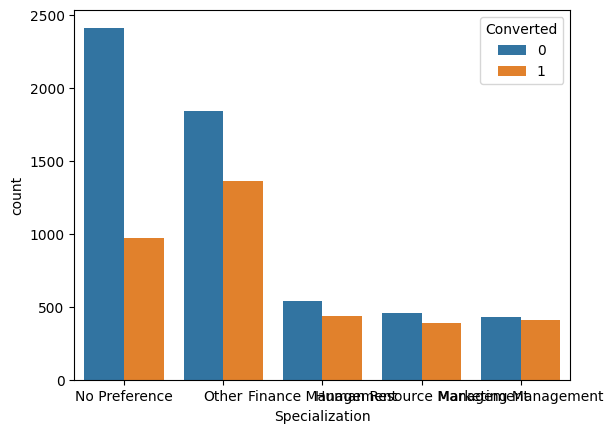

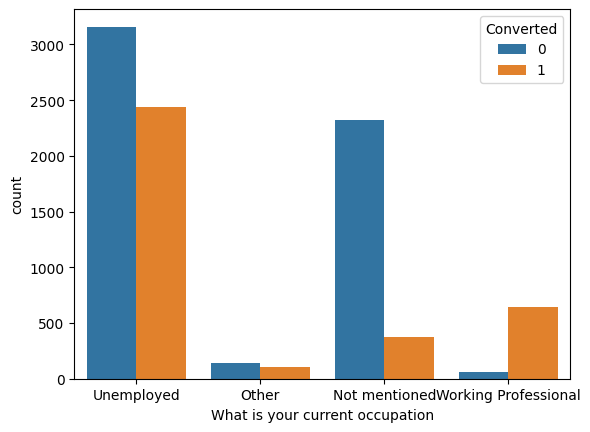

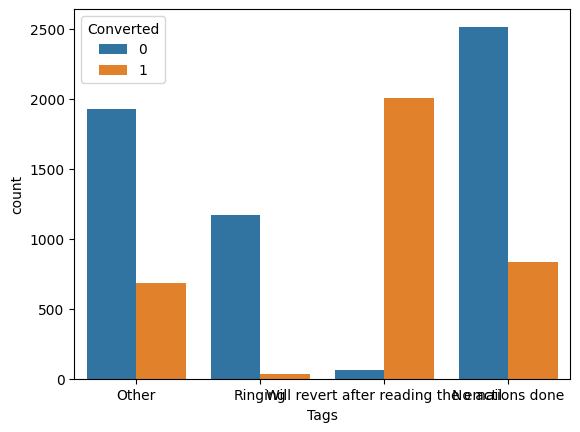

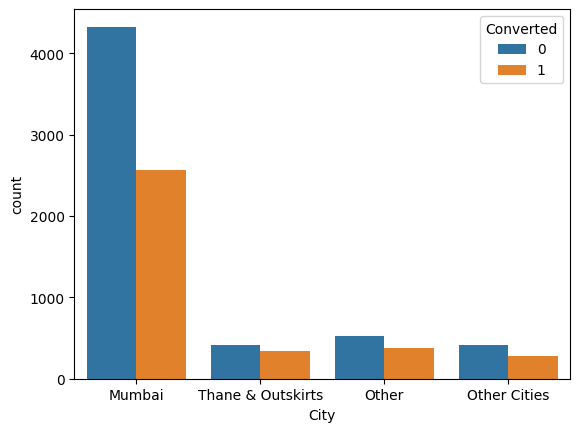

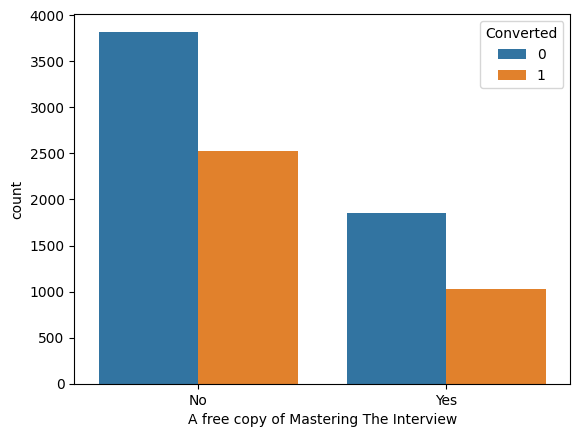

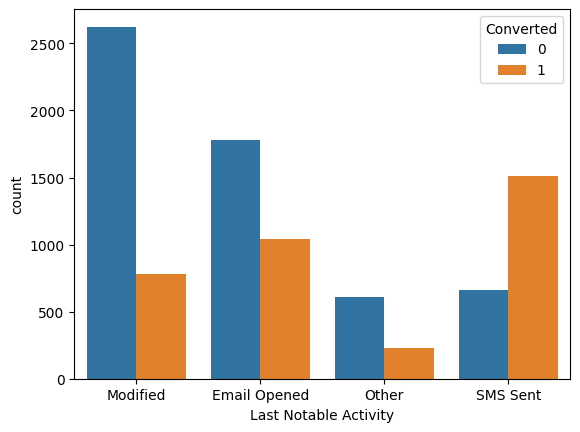

In [436]:
for col in categorical_cols:
    sns.countplot(data=df, x=col, hue='Converted')
    plt.show()

(array([2584., 1680., 1443., 1120.,  783.,  466.,  309.,  224.,  164.,
         467.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

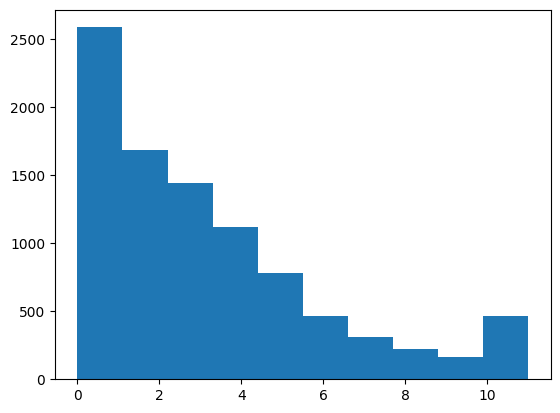

In [437]:
plt.hist(df['TotalVisits'])

Most total visits are under 5 times and has a contnuos decrease


(array([4413., 1518.,  477.,  460.,  686.,  713.,  573.,  292.,   89.,
          19.]),
 array([   0. ,  227.2,  454.4,  681.6,  908.8, 1136. , 1363.2, 1590.4,
        1817.6, 2044.8, 2272. ]),
 <BarContainer object of 10 artists>)

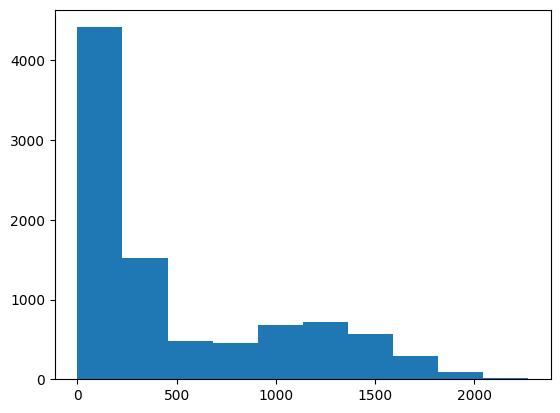

In [438]:
plt.hist(df['Total Time Spent on Website'])

Most students spend only < 500min on the site and has a contnuous decrease

(array([2189.,  759., 2388.,  424., 1254., 1016.,   59.,  544.,  247.,
         360.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

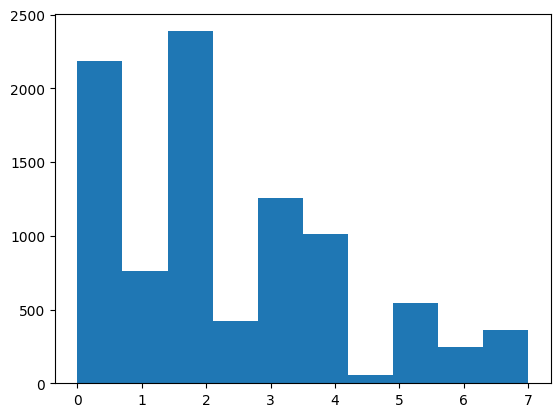

In [439]:
plt.hist(df['Page Views Per Visit'])

Most students view only less than 2 pages and this variable does not have a linear pattern

#### Bivariate Analysis

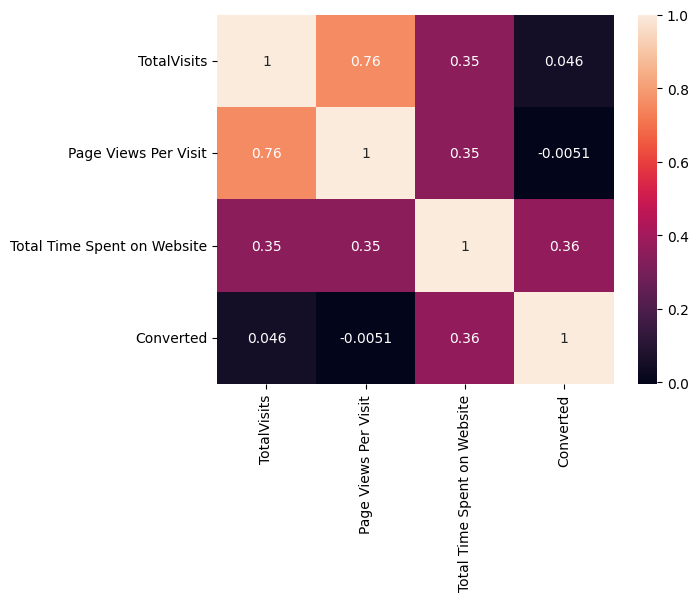

In [440]:
sns.heatmap(df[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website', 'Converted']].corr(), annot=True)
plt.show()

Time spent on website have a good +ve correlation with convertion. Total visits and Page views per visit have high correlation. We might need to drop them after checking multicollinearity. 

#### Multivariate analysis

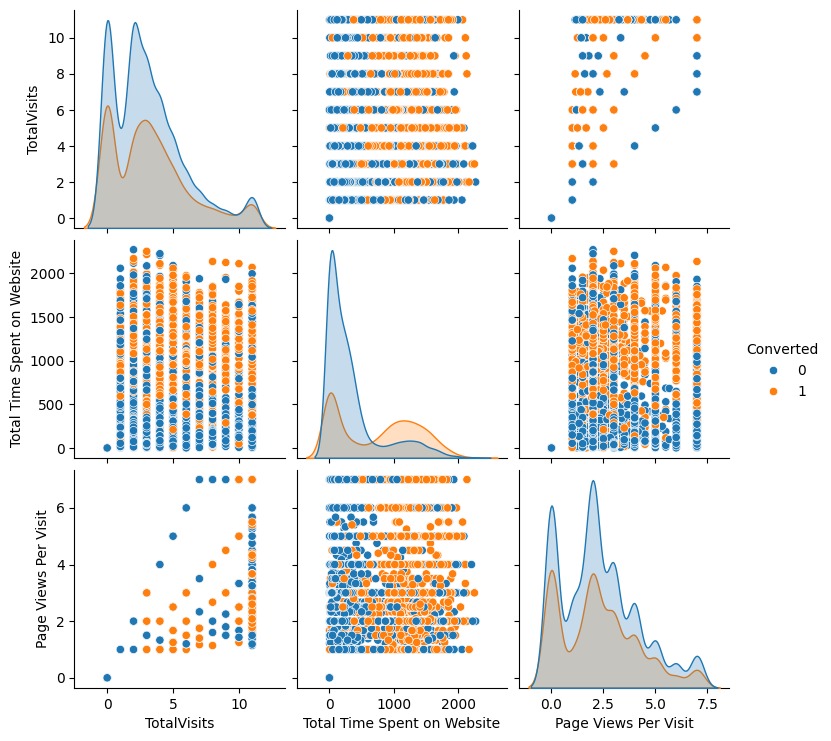

In [441]:
sns.pairplot(df, diag_kind='kde', hue='Converted')
plt.show()

Unable to observe any useful patterns here

### Categorical Encoding

In [442]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Other,Other,No Preference,Unemployed,Other,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,No Preference,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Other,Other,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Other,India,Other,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Other,India,No Preference,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [443]:
for col in categorical_cols:
    dummies = pd.get_dummies(df[col], prefix=col, prefix_sep='__', drop_first=True, dtype=int)
    df = pd.concat([df, dummies], axis=1)
    df.drop(columns=[col], inplace=True)
    
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin__Landing Page Submission,Lead Origin__Other,Lead Source__Google,Lead Source__Olark Chat,Lead Source__Organic Search,Lead Source__Other,...,Tags__Other,Tags__Ringing,Tags__Will revert after reading the email,City__Other,City__Other Cities,City__Thane & Outskirts,A free copy of Mastering The Interview__Yes,Last Notable Activity__Modified,Last Notable Activity__Other,Last Notable Activity__SMS Sent
0,0,0.0,0,0.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [444]:
# replace all column names into standard python variable names
col_map = {}
for col in df.columns:
    col_map[col] = col.replace(' ', '_').lower()
    
df.rename(columns=col_map, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   converted                                              9240 non-null   int64  
 1   totalvisits                                            9240 non-null   float64
 2   total_time_spent_on_website                            9240 non-null   int64  
 3   page_views_per_visit                                   9240 non-null   float64
 4   lead_origin__landing_page_submission                   9240 non-null   int64  
 5   lead_origin__other                                     9240 non-null   int64  
 6   lead_source__google                                    9240 non-null   int64  
 7   lead_source__olark_chat                                9240 non-null   int64  
 8   lead_source__organic_search                     

In [445]:
df.head()

,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,lead_origin__landing_page_submission,lead_origin__other,lead_source__google,lead_source__olark_chat,lead_source__organic_search,lead_source__other,...,tags__other,tags__ringing,tags__will_revert_after_reading_the_email,city__other,city__other_cities,city__thane_&_outskirts,a_free_copy_of_mastering_the_interview__yes,last_notable_activity__modified,last_notable_activity__other,last_notable_activity__sms_sent
0,0,0.0,0,0.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,1,2.0,1428,1.0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


### Train Test Split

In [446]:
# we need to to train test split before 
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['converted']), df['converted'], test_size=0.2, random_state=42)

In [447]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(7392, 31) (7392,) (1848, 31) (1848,)


### Standaridization


In [448]:
numeric_cols = ['totalvisits', 'total_time_spent_on_website', 'page_views_per_visit']
scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])

StandardScaler()

In [449]:
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

### Feature selection and Modeling

In [450]:
model = LogisticRegression()

In [451]:
X_train[numeric_cols].shape

(7392, 3)

In [452]:
rfe = RFE(model, n_features_to_select=20)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [453]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('totalvisits', True, 1),
 ('total_time_spent_on_website', True, 1),
 ('page_views_per_visit', True, 1),
 ('lead_origin__landing_page_submission', True, 1),
 ('lead_origin__other', True, 1),
 ('lead_source__google', False, 4),
 ('lead_source__olark_chat', True, 1),
 ('lead_source__organic_search', False, 9),
 ('lead_source__other', False, 3),
 ('do_not_email__yes', True, 1),
 ('last_activity__olark_chat_conversation', True, 1),
 ('last_activity__other', True, 1),
 ('last_activity__sms_sent', True, 1),
 ('country__other', True, 1),
 ('specialization__human_resource_management', False, 6),
 ('specialization__marketing_management', False, 10),
 ('specialization__no_preference', True, 1),
 ('specialization__other', False, 7),
 ('what_is_your_current_occupation__other', True, 1),
 ('what_is_your_current_occupation__unemployed', True, 1),
 ('what_is_your_current_occupation__working_professional', True, 1),
 ('tags__other', True, 1),
 ('tags__ringing', True, 1),
 ('tags__will_revert_after_re

In [454]:
selected_cols = list(X_train.columns[rfe.support_])
selected_cols

['totalvisits',
 'total_time_spent_on_website',
 'page_views_per_visit',
 'lead_origin__landing_page_submission',
 'lead_origin__other',
 'lead_source__olark_chat',
 'do_not_email__yes',
 'last_activity__olark_chat_conversation',
 'last_activity__other',
 'last_activity__sms_sent',
 'country__other',
 'specialization__no_preference',
 'what_is_your_current_occupation__other',
 'what_is_your_current_occupation__unemployed',
 'what_is_your_current_occupation__working_professional',
 'tags__other',
 'tags__ringing',
 'tags__will_revert_after_reading_the_email',
 'last_notable_activity__other',
 'last_notable_activity__sms_sent']

In [455]:
X_train_sm = sm.add_constant(X_train[selected_cols])

In [456]:
log_sm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_sm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7371
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1938.2
Date:                Tue, 16 Jan 2024   Deviance:                       3876.3
Time:                        18:43:10   Pearson chi2:                 1.27e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5530
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.9266      0.181    -10.628      0.000      -2.282      -1.571
totalvisits                                               0.4212      0.062      6.815      0.000       0.300       0.542
total_time_spent_on_website                               1.0318      0.048     21.606      0.000       0.938       1.125
page_views_per_visit                                     -0.4193      0.072     -5.807      0.000      -0.561      -0.278
lead_origin__landing_page_submission                     -0.2935      0.162     -1.815      0.070      -0.611       0.023
lead_origin__other                                        2.7606      0.278      9.934      0.000       2.216       3.305
lead_source__olark_chat                                   0.7263      0.229      3.168      0.002       0.277       1.176
do_not_email__yes                                        -1.4516      0.208     -6.993      0.000      -1.858      -1.045
last_activity__olark_chat_conversation                   -1.4956      0.187     -7.994      0.000      -1.862      -1.129
last_activity__other                                     -0.6745      0.137     -4.912      0.000      -0.944      -0.405
last_activity__sms_sent                                   0.4343      0.161      2.702      0.007       0.119       0.749
country__other                                            0.2140      0.193      1.111      0.267      -0.164       0.592
specialization__no_preference                            -0.3116      0.155     -2.005      0.045      -0.616      -0.007
what_is_your_current_occupation__other                    1.4871      0.315      4.719      0.000       0.869       2.105
what_is_your_current_occupation__unemployed               1.8998      0.133     14.317      0.000       1.640       2.160
what_is_your_current_occupation__working_professional     3.0543      0.257     11.877      0.000       2.550       3.558
tags__other                                              -1.3189      0.132     -9.981      0.000      -1.578      -1.060
tags__ringing                                            -4.6649      0.243    -19.169      0.000      -5.142      -4.188
tags__will_revert_after_reading_the_email                 2.7232      0.196     13.906      0.000       2.339       3.107
last_notable_activity__other                              0.5580      0.173      3.219      0.001       0.218       0.898
last_notable_activity__sms_sent                           1.4173      0.174      8.156      0.000       1.077       1.758
=========================================================================================================================
"""

In [457]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,18.54
6,lead_source__olark_chat,4.91
11,country__other,4.70
10,last_activity__sms_sent,4.00
20,last_notable_activity__sms_sent,3.88
14,what_is_your_current_occupation__unemployed,3.66
4,lead_origin__landing_page_submission,3.51
18,tags__will_revert_after_reading_the_email,3.25
16,tags__other,3.19
5,lead_origin__other,3.11


In [458]:
X_train_sm.drop(columns=['country__other'], inplace=True)
selected_cols.remove('country__other')

In [459]:
log_sm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_sm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7372
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1938.8
Date:                Tue, 16 Jan 2024   Deviance:                       3877.5
Time:                        18:43:14   Pearson chi2:                 1.26e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5529
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.9421      0.181    -10.753      0.000      -2.296      -1.588
totalvisits                                               0.4172      0.062      6.762      0.000       0.296       0.538
total_time_spent_on_website                               1.0289      0.048     21.585      0.000       0.935       1.122
page_views_per_visit                                     -0.4210      0.072     -5.832      0.000      -0.562      -0.279
lead_origin__landing_page_submission                     -0.2642      0.159     -1.658      0.097      -0.577       0.048
lead_origin__other                                        2.9574      0.215     13.755      0.000       2.536       3.379
lead_source__olark_chat                                   0.9061      0.163      5.560      0.000       0.587       1.225
do_not_email__yes                                        -1.4435      0.208     -6.956      0.000      -1.850      -1.037
last_activity__olark_chat_conversation                   -1.4966      0.187     -7.990      0.000      -1.864      -1.129
last_activity__other                                     -0.6798      0.137     -4.954      0.000      -0.949      -0.411
last_activity__sms_sent                                   0.4283      0.161      2.666      0.008       0.113       0.743
specialization__no_preference                            -0.2792      0.152     -1.832      0.067      -0.578       0.020
what_is_your_current_occupation__other                    1.4817      0.315      4.705      0.000       0.865       2.099
what_is_your_current_occupation__unemployed               1.8966      0.133     14.299      0.000       1.637       2.157
what_is_your_current_occupation__working_professional     3.0657      0.257     11.938      0.000       2.562       3.569
tags__other                                              -1.3121      0.132     -9.943      0.000      -1.571      -1.053
tags__ringing                                            -4.6627      0.243    -19.173      0.000      -5.139      -4.186
tags__will_revert_after_reading_the_email                 2.7285      0.196     13.940      0.000       2.345       3.112
last_notable_activity__other                              0.5605      0.173      3.233      0.001       0.221       0.900
last_notable_activity__sms_sent                           1.4246      0.174      8.201      0.000       1.084       1.765
=========================================================================================================================
"""

In [460]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,18.50
10,last_activity__sms_sent,3.99
19,last_notable_activity__sms_sent,3.88
13,what_is_your_current_occupation__unemployed,3.66
4,lead_origin__landing_page_submission,3.45
17,tags__will_revert_after_reading_the_email,3.24
15,tags__other,3.19
11,specialization__no_preference,3.03
3,page_views_per_visit,2.99
1,totalvisits,2.56


In [461]:
X_train_sm.drop(columns=['lead_origin__landing_page_submission'], inplace=True)
selected_cols.remove('lead_origin__landing_page_submission')

In [462]:
log_sm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_sm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7373
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1940.1
Date:                Tue, 16 Jan 2024   Deviance:                       3880.3
Time:                        18:43:15   Pearson chi2:                 1.24e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5528
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.1802      0.110    -19.765      0.000      -2.396      -1.964
totalvisits                                               0.4234      0.062      6.883      0.000       0.303       0.544
total_time_spent_on_website                               1.0339      0.048     21.708      0.000       0.941       1.127
page_views_per_visit                                     -0.4300      0.072     -5.965      0.000      -0.571      -0.289
lead_origin__other                                        3.0896      0.200     15.419      0.000       2.697       3.482
lead_source__olark_chat                                   0.9845      0.156      6.296      0.000       0.678       1.291
do_not_email__yes                                        -1.4645      0.207     -7.077      0.000      -1.870      -1.059
last_activity__olark_chat_conversation                   -1.4784      0.186     -7.928      0.000      -1.844      -1.113
last_activity__other                                     -0.6840      0.137     -4.984      0.000      -0.953      -0.415
last_activity__sms_sent                                   0.4237      0.160      2.642      0.008       0.109       0.738
specialization__no_preference                            -0.1027      0.109     -0.943      0.346      -0.316       0.111
what_is_your_current_occupation__other                    1.4890      0.313      4.750      0.000       0.875       2.103
what_is_your_current_occupation__unemployed               1.9053      0.132     14.387      0.000       1.646       2.165
what_is_your_current_occupation__working_professional     3.0994      0.255     12.166      0.000       2.600       3.599
tags__other                                              -1.3149      0.132     -9.969      0.000      -1.573      -1.056
tags__ringing                                            -4.6818      0.243    -19.243      0.000      -5.159      -4.205
tags__will_revert_after_reading_the_email                 2.7461      0.195     14.053      0.000       2.363       3.129
last_notable_activity__other                              0.5574      0.173      3.218      0.001       0.218       0.897
last_notable_activity__sms_sent                           1.4236      0.173      8.206      0.000       1.084       1.764
=========================================================================================================================
"""

In [463]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,7.31
9,last_activity__sms_sent,3.99
18,last_notable_activity__sms_sent,3.88
12,what_is_your_current_occupation__unemployed,3.65
16,tags__will_revert_after_reading_the_email,3.22
14,tags__other,3.19
3,page_views_per_visit,2.96
1,totalvisits,2.55
15,tags__ringing,2.33
5,lead_source__olark_chat,2.28


In [464]:
X_train_sm.drop(columns=['specialization__no_preference'], inplace=True)
selected_cols.remove('specialization__no_preference')

In [465]:
X_train_sm.head()

,const,totalvisits,total_time_spent_on_website,page_views_per_visit,lead_origin__other,lead_source__olark_chat,do_not_email__yes,last_activity__olark_chat_conversation,last_activity__other,last_activity__sms_sent,what_is_your_current_occupation__other,what_is_your_current_occupation__unemployed,what_is_your_current_occupation__working_professional,tags__other,tags__ringing,tags__will_revert_after_reading_the_email,last_notable_activity__other,last_notable_activity__sms_sent
6487,1.0,-0.433198,-0.454165,-0.163716,0,0,1,0,0,1,0,1,0,0,1,0,0,1
4759,1.0,-1.129102,-0.889097,-1.231335,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4368,1.0,-0.085246,-0.168456,0.370094,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1467,1.0,0.262706,0.737805,0.903903,0,0,0,0,0,1,0,0,1,0,0,1,0,1
5517,1.0,-0.433198,-0.628866,-0.163716,0,0,0,0,1,0,0,1,0,1,0,0,0,0


In [466]:
log_sm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_sm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7374
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1940.6
Date:                Tue, 16 Jan 2024   Deviance:                       3881.2
Time:                        18:43:19   Pearson chi2:                 1.24e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5527
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.2204      0.102    -21.756      0.000      -2.420      -2.020
totalvisits                                               0.4268      0.061      6.951      0.000       0.306       0.547
total_time_spent_on_website                               1.0357      0.048     21.749      0.000       0.942       1.129
page_views_per_visit                                     -0.4184      0.071     -5.891      0.000      -0.558      -0.279
lead_origin__other                                        3.0763      0.200     15.395      0.000       2.685       3.468
lead_source__olark_chat                                   0.9549      0.153      6.245      0.000       0.655       1.255
do_not_email__yes                                        -1.4629      0.207     -7.063      0.000      -1.869      -1.057
last_activity__olark_chat_conversation                   -1.4953      0.186     -8.060      0.000      -1.859      -1.132
last_activity__other                                     -0.6813      0.137     -4.965      0.000      -0.950      -0.412
last_activity__sms_sent                                   0.4261      0.160      2.658      0.008       0.112       0.740
what_is_your_current_occupation__other                    1.4716      0.312      4.713      0.000       0.860       2.084
what_is_your_current_occupation__unemployed               1.8900      0.131     14.387      0.000       1.633       2.147
what_is_your_current_occupation__working_professional     3.1072      0.254     12.217      0.000       2.609       3.606
tags__other                                              -1.2839      0.128    -10.057      0.000      -1.534      -1.034
tags__ringing                                            -4.6593      0.242    -19.245      0.000      -5.134      -4.185
tags__will_revert_after_reading_the_email                 2.7827      0.192     14.525      0.000       2.407       3.158
last_notable_activity__other                              0.5547      0.173      3.204      0.001       0.215       0.894
last_notable_activity__sms_sent                           1.4219      0.173      8.197      0.000       1.082       1.762
=========================================================================================================================
"""

In [467]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,6.32
9,last_activity__sms_sent,3.99
17,last_notable_activity__sms_sent,3.88
11,what_is_your_current_occupation__unemployed,3.62
13,tags__other,3.08
15,tags__will_revert_after_reading_the_email,3.05
3,page_views_per_visit,2.92
1,totalvisits,2.54
12,what_is_your_current_occupation__working_profe...,2.27
14,tags__ringing,2.27


### Evaluation

In [468]:
y_train_pred = res.predict(X_train_sm)

In [469]:
threshold_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y_train_pred_dict = {}
for threshold in threshold_values:
    y_train_pred_dict[threshold] = y_train_pred.map(lambda x: 1 if x > threshold else 0)

In [470]:
evaluation_df = pd.DataFrame(columns=['threshold', 'accuracy', 'sensitivity', 'specificity', 'precision', 'recall'])
count = 1
for threshold, y_pred in y_train_pred_dict.items():
    conf_matrics = confusion_matrix(y_true=y_train, y_pred=y_pred)
    TP = conf_matrics[1][1]
    FP = conf_matrics[0][1]
    TN = conf_matrics[0][0]
    FN = conf_matrics[1][0]

    accuracy = round((TP+TN) / (TP + TN + FP + FN), 2)
    specificity = round(TN / (TN + FP), 2)
    sensitivity = round(TP / (TP + FN), 2)
    precision = round(TP / (TP + FP), 2)
    recall = round(TP / (TP + FN), 2)
    evaluation_df.loc[count] = [threshold, accuracy, sensitivity, specificity, precision, recall]
    count += 1
    print(f'Threshold: {threshold} | Accuracy: {accuracy} | Specificity: {specificity} | Sensitivity: {sensitivity}')


Threshold: 0.1 | Accuracy: 0.77 | Specificity: 0.65 | Sensitivity: 0.96
Threshold: 0.2 | Accuracy: 0.87 | Specificity: 0.83 | Sensitivity: 0.92
Threshold: 0.3 | Accuracy: 0.89 | Specificity: 0.88 | Sensitivity: 0.9
Threshold: 0.4 | Accuracy: 0.89 | Specificity: 0.91 | Sensitivity: 0.87
Threshold: 0.5 | Accuracy: 0.89 | Specificity: 0.94 | Sensitivity: 0.81
Threshold: 0.6 | Accuracy: 0.89 | Specificity: 0.96 | Sensitivity: 0.79
Threshold: 0.7 | Accuracy: 0.88 | Specificity: 0.97 | Sensitivity: 0.74
Threshold: 0.8 | Accuracy: 0.87 | Specificity: 0.98 | Sensitivity: 0.69
Threshold: 0.9 | Accuracy: 0.84 | Specificity: 0.99 | Sensitivity: 0.6


In [471]:
evaluation_df

,threshold,accuracy,sensitivity,specificity,precision,recall
1,0.1,0.77,0.96,0.65,0.63,0.96
2,0.2,0.87,0.92,0.83,0.77,0.92
3,0.3,0.89,0.90,0.88,0.82,0.90
4,0.4,0.89,0.87,0.91,0.86,0.87
5,0.5,0.89,0.81,0.94,0.90,0.81
6,0.6,0.89,0.79,0.96,0.92,0.79
7,0.7,0.88,0.74,0.97,0.94,0.74
8,0.8,0.87,0.69,0.98,0.96,0.69
9,0.9,0.84,0.60,0.99,0.98,0.60


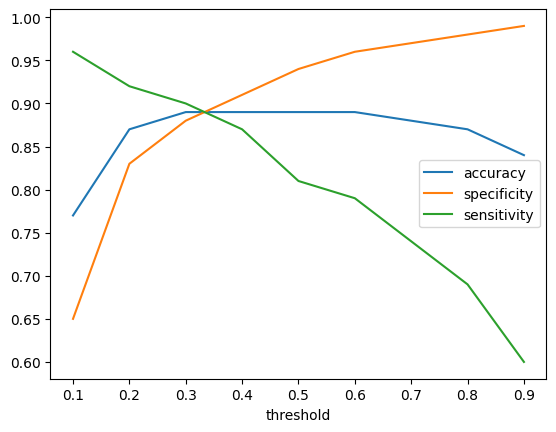

In [472]:
evaluation_df.plot.line(x='threshold', y=['accuracy', 'specificity', 'sensitivity'])
plt.show()

#### Around 3.3 we get an intersection. We'll be using this point as the threshold.

[]

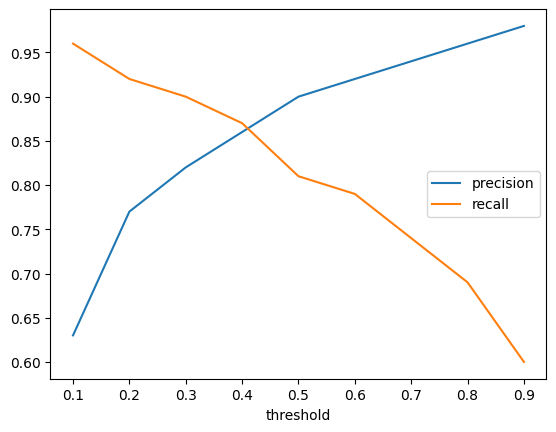

In [473]:
evaluation_df.plot.line(x='threshold', y=['precision', 'recall'])
plt.plot()

In [474]:
X_test_sm = sm.add_constant(X_test[selected_cols])
y_test_pred = res.predict(X_test_sm)

In [475]:
threshold = .33
final_result = y_test_pred.map(lambda x: 1 if x > threshold else 0)

In [476]:
conf_matrics = confusion_matrix(y_true=y_test, y_pred=final_result)
TP = conf_matrics[1][1]
FP = conf_matrics[0][1]
TN = conf_matrics[0][0]
FN = conf_matrics[1][0]

accuracy = round((TP+TN) / (TP + TN + FP + FN), 2)
specificity = round(TN / (TN + FP), 2)
sensitivity = round(TP / (TP + FN), 2)

### Summary

Final model metrics


In [477]:
print(f'Threshold: {threshold} | Accuracy: {accuracy} | Specificity: {specificity} | Sensitivity: {sensitivity}')


Threshold: 0.33 | Accuracy: 0.9 | Specificity: 0.9 | Sensitivity: 0.9
